In [1]:
import pandas as pd
import os

In [2]:
os.chdir('E:\SkillEnable Class\Python\Datasets')

In [3]:
# Read and access the data
mall = pd.read_csv('Mall_Customers.csv')

In [4]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
mall.groupby('Gender')[['Annual Income (k$)']].mean().reset_index()

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


In [7]:
mall.groupby('Gender')[['Spending Score (1-100)']].mean().reset_index()

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

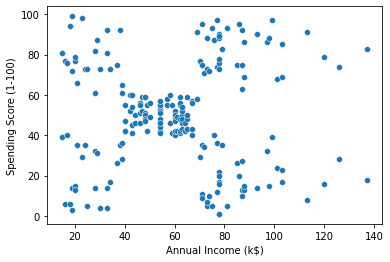

In [9]:
sns.scatterplot(mall['Annual Income (k$)'],mall['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

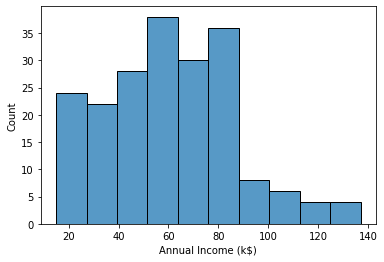

In [10]:
sns.histplot(mall['Annual Income (k$)'])

In [11]:
mall.drop(columns=['CustomerID'], inplace = True)
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
mall_final = pd.get_dummies(mall, columns=["Gender"], drop_first=True)
mall_final.shape

(200, 4)

In [13]:
mall_final.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [14]:
from sklearn.cluster import KMeans

In [15]:
for i in range(1, 11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [16]:
error = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(mall_final)
    error.append(km.inertia_)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
error

[308862.05999999994,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51130.69008126377,
 44357.326649026654,
 40861.79451298702,
 37637.82435786436]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


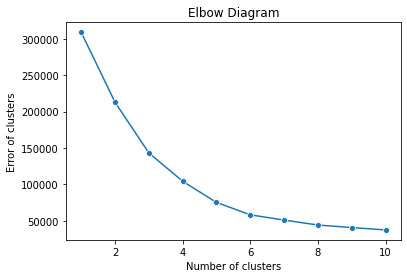

In [18]:
# Finding the number of clusters using the elbow diagram
sns.lineplot(range(1,11), error, marker='o')
plt.title('Elbow Diagram')
plt.xlabel('Number of clusters')
plt.ylabel('Error of clusters')
plt.show()

In [19]:
# Fitting the model into data
km_5 = KMeans(n_clusters = 5).fit(mall_final)

In [20]:
clusters = km_5.fit_predict(mall_final)

In [21]:
mall['Cluster'] = clusters
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [22]:
mall['Cluster'].value_counts()

1    79
0    39
2    36
4    23
3    23
Name: Cluster, dtype: int64

In [23]:
mall.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,32.692308,86.538462,82.128205
1,1,43.088608,55.291139,49.569620
2,2,40.666667,87.750000,17.583333
3,3,25.521739,26.304348,78.565217
4,4,45.217391,26.304348,20.913043


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

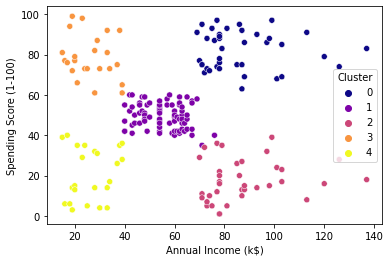

In [24]:
# Final plot
sns.scatterplot(mall['Annual Income (k$)'],mall['Spending Score (1-100)'], hue = mall['Cluster'], palette='plasma')